In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")   # <-- use your file path
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [7]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = df[features].copy()
y = df["Survived"]

In [8]:
num_imputer = SimpleImputer(strategy="median")
X[["Age", "Fare"]] = num_imputer.fit_transform(X[["Age", "Fare"]])

In [9]:

cat_imputer = SimpleImputer(strategy="most_frequent")
X[["Embarked"]] = cat_imputer.fit_transform(X[["Embarked"]])

In [10]:
label_enc = LabelEncoder()
X["Sex"] = label_enc.fit_transform(X["Sex"].astype(str))
X["Embarked"] = label_enc.fit_transform(X["Embarked"].astype(str))

In [11]:
print(X.dtypes)

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [14]:
y_pred = model.predict(X_test)


In [15]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[90 15]
 [19 55]]


C:\Users\Jeyanthan GJ\AppData\Local\Temp\ipykernel_2744\2662871764.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Survived", palette="Set2")


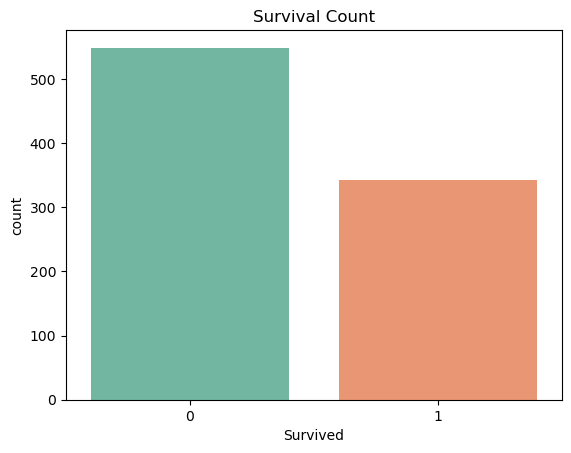

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Survived", palette="Set2")
plt.title("Survival Count")
plt.show()


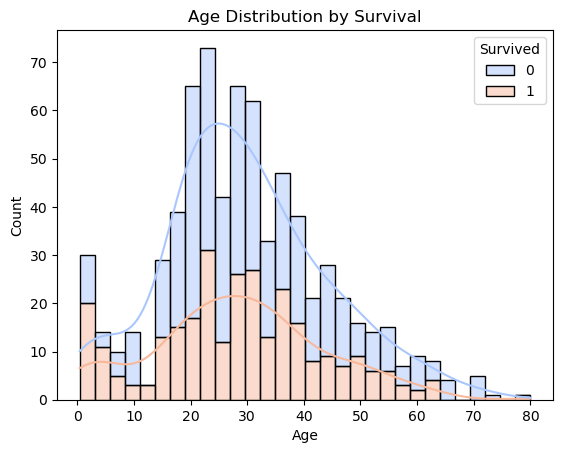

In [18]:
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=30, kde=True, palette="coolwarm")
plt.title("Age Distribution by Survival")
plt.show()


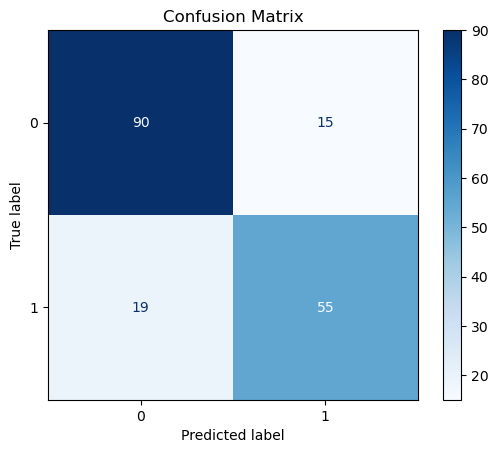

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


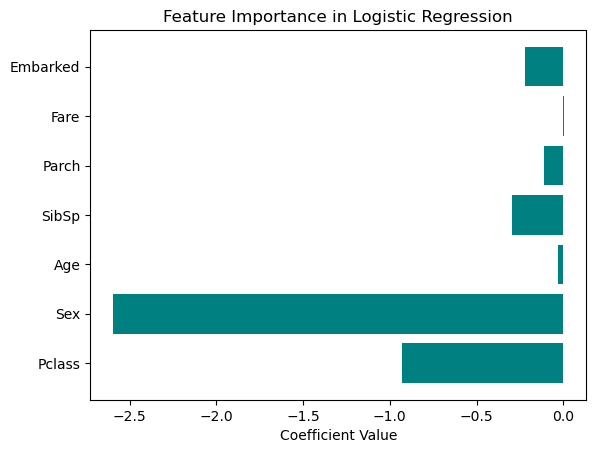

In [20]:
import numpy as np

coefficients = model.coef_[0]
features = X.columns

plt.barh(features, coefficients, color="teal")
plt.xlabel("Coefficient Value")
plt.title("Feature Importance in Logistic Regression")
plt.show()
